In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import datetime
df= pd.read_csv('delhi.csv',parse_dates=True)

for i in range(2009):
    df['Date'][i] = datetime.datetime.strptime(df['Date'][i], "%d-%m-%Y").strftime("%Y-%m-%d")

df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.shape

(2009, 16)

In [5]:
df.head(5)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [6]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,2007.000000,1932.000000,2007.000000,2007.000000,2009.000000,2000.000000,2009.000000,1899.000000,1925.00000,2009.000000,2009.000000,1228.000000,1999.000000
mean,117.196153,232.809229,38.985595,50.785182,58.567023,41.997150,1.976053,15.901253,51.32361,3.544480,17.185042,1.438339,259.487744
std,82.912945,121.873025,33.389456,22.696721,37.690350,17.301221,2.560253,7.966770,26.06234,2.431232,15.291597,2.377762,119.537333
min,10.240000,18.590000,3.570000,10.630000,0.000000,6.780000,0.000000,2.340000,6.94000,0.000000,0.000000,0.000000,29.000000
25%,57.095000,137.040000,15.895000,33.895000,31.150000,31.157500,0.910000,10.335000,33.71000,1.870000,6.650000,0.110000,161.500000
50%,94.620000,216.730000,27.200000,47.150000,52.750000,38.040000,1.240000,14.450000,44.44000,2.960000,12.750000,0.650000,257.000000
75%,153.030000,311.667500,50.790000,63.570000,75.360000,48.792500,1.870000,19.700000,60.84000,4.680000,23.200000,1.970000,345.500000
max,685.360000,796.880000,221.030000,162.500000,254.800000,166.700000,30.440000,71.560000,257.73000,20.640000,103.000000,23.300000,716.000000


In [7]:
cities=pd.unique(df['City'])
column1= cities+'_PM2.5'

In [8]:
len(column1)

1

In [9]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [10]:
arr=dict()
for i in range(len(cities)):
    arr[cities[i]] = 0
    

for i in range(len(cities)):
    for j in range(2009):
        if(cities[i]==df['City'][j]):
            arr[cities[i]]+=1
            
            
print(arr)

{'Delhi': 2009}


In [11]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-07-02',dtype='datetime64[D]'),columns=column1)

print(final_df.shape)
final_df.head()

(2009, 1)


,Delhi_PM2.5
2015-01-01,NaN
2015-01-02,NaN
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,NaN


In [12]:
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['PM2.5']))
    print(n)
    final_df[i][-n:]=np.array(df[df['City']==city]['PM2.5'])

2009


In [13]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [14]:
final_df.tail()
final_df.head()

,Delhi_PM2.5
2015-01-01,175.690645
2015-02-01,153.920357
2015-03-01,80.338065
2015-04-01,91.562333
2015-05-01,97.109355


In [15]:
final_df['US_PM2.5']=final_df.mean(axis=1)

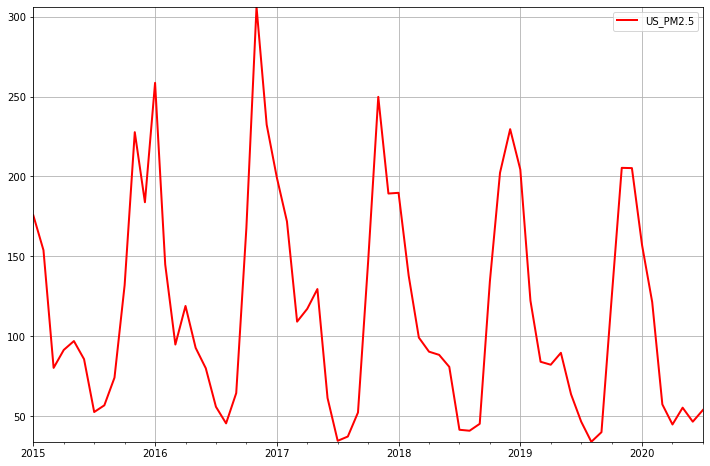

In [16]:
ax=final_df[['US_PM2.5']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [17]:
df_2019=final_df['2019-01-01':'2020-01-01']
df_2019.head()

,Delhi_PM2.5,US_PM2.5
2019-01-01,204.347097,204.347097
2019-02-01,122.316429,122.316429
2019-03-01,84.150968,84.150968
2019-04-01,82.311000,82.311000
2019-05-01,89.748065,89.748065


In [18]:
df_2019.isna().sum()

Delhi_PM2.5    0
US_PM2.5       0
dtype: int64

In [19]:
AQI_2019=df_2019.mean(axis=0)
AQI_2019.head()

Delhi_PM2.5    112.238603
US_PM2.5       112.238603
dtype: float64

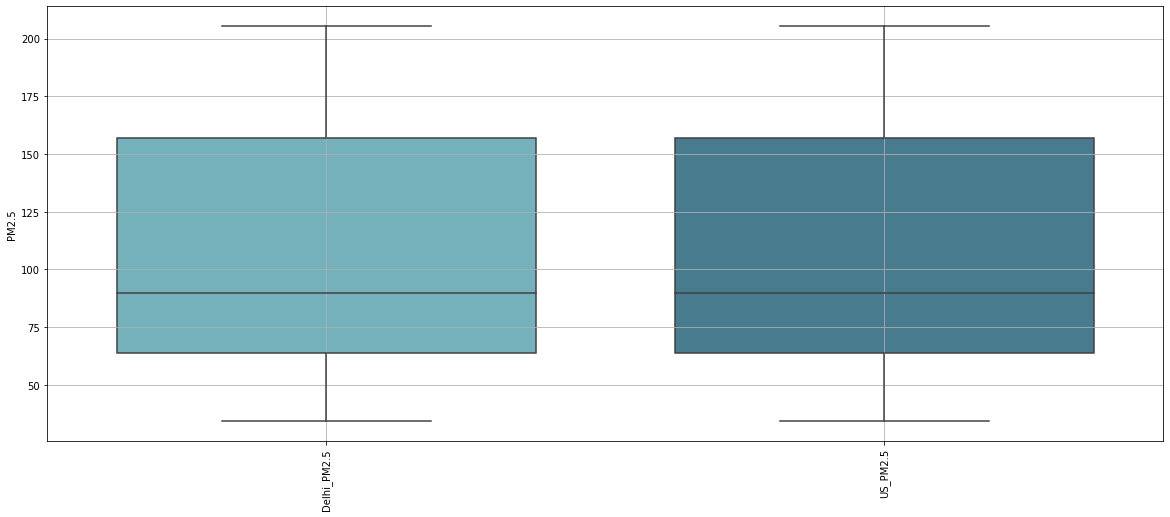

In [20]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="GnBu_d")
plt.ylabel('PM2.5');
bplot.grid(True)

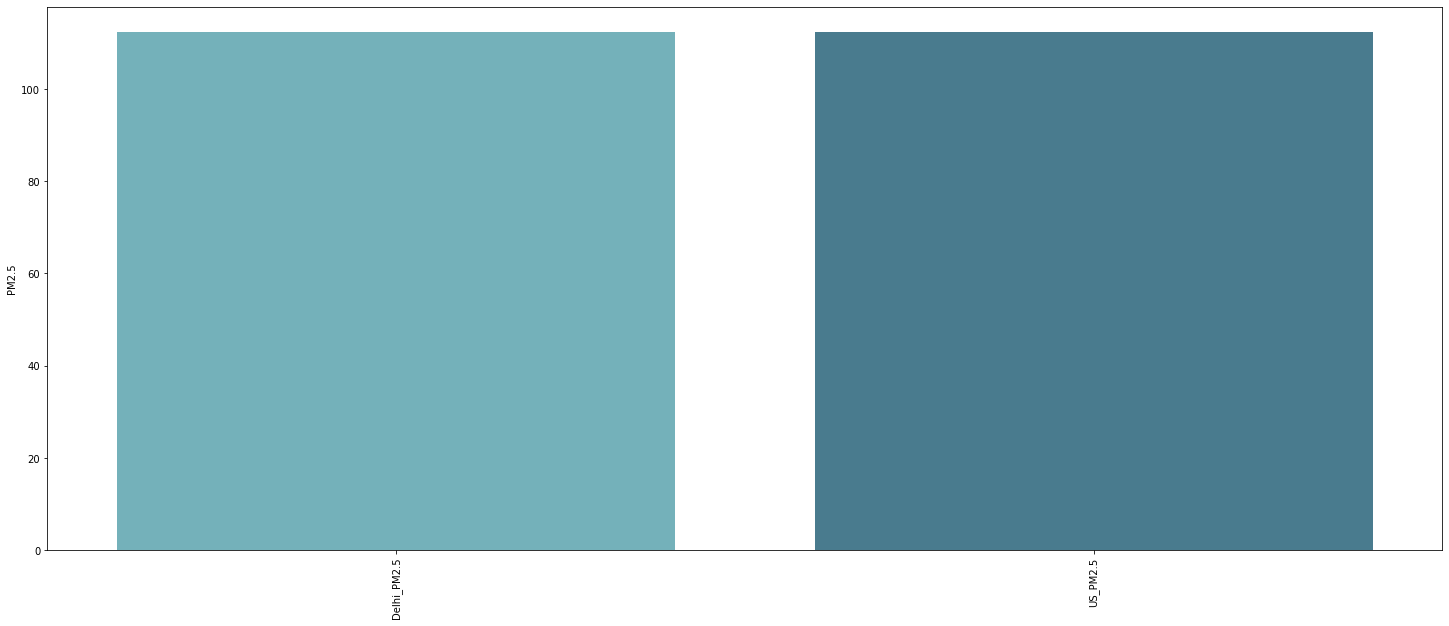

In [21]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.ylabel('PM2.5')
bplot=sns.barplot(AQI_2019.index, AQI_2019.values,palette="GnBu_d")

In [22]:
final_df.head()

,Delhi_PM2.5,US_PM2.5
2015-01-01,175.690645,175.690645
2015-02-01,153.920357,153.920357
2015-03-01,80.338065,80.338065
2015-04-01,91.562333,91.562333
2015-05-01,97.109355,97.109355


2015-01-01    175.690645
2015-02-01    153.920357
2015-03-01     80.338065
2015-04-01     91.562333
2015-05-01     97.109355
                 ...    
2020-03-01     57.506452
2020-04-01     44.940000
2020-05-01     55.448710
2020-06-01     46.694667
2020-07-01     54.010000
Freq: MS, Name: US_PM2.5, Length: 67, dtype: float64


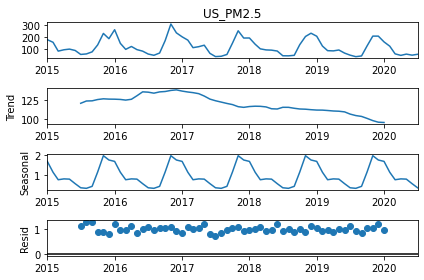

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
delhi_AQI=final_df['US_PM2.5']

print(delhi_AQI)
result=seasonal_decompose(delhi_AQI,model='multiplicative')
result.plot();

In [24]:
type(delhi_AQI)

pandas.core.series.Series

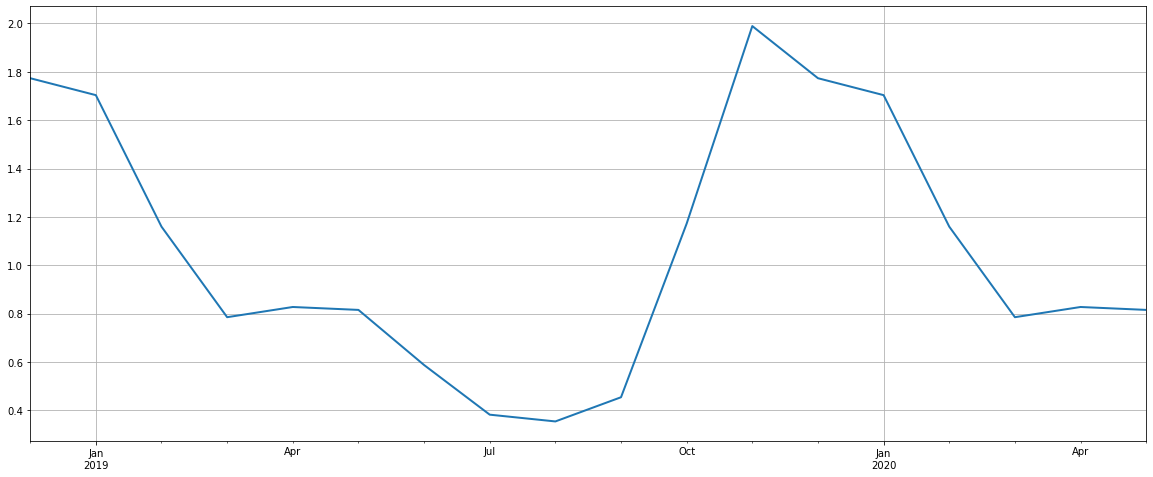

In [25]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-12-30','2020-05-15'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [26]:
# # Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima;
from pmdarima import auto_arima;  

You should consider upgrading via the 'C:\Users\Asus\anaconda3\python.exe -m pip install --upgrade pip' command.


In [27]:
auto_arima(y=delhi_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=False, m=12).summary()# len(India_AQI)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   67
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -339.736
Date:                Wed, 29 Dec 2021   AIC                            689.471
Time:                        15:28:46   BIC                            700.495
Sample:                             0   HQIC                           693.833
                                 - 67                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.3026      6.166      5.401      0.000      21.217      45.388
ar.L1          1.5255      0.097     15.715      0.000       1.335       1.716
ar.L2         -0.8058      0.078    -10.396      0.000      -0.958      -0.654
ma.L1         -0.7415      0.128     -5.808      0.000      -0.992      -0.491
sigma2      1445.7692    288.408      5.013      0.000     880.500    2011.038
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.55
Prob(Q):                              0.97   Prob(JB):                         0.04
Heteroskedasticity (H):               0.53   Skew:                             0.76
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
len(delhi_AQI)

67

In [29]:
#dividing into train and test:
train=delhi_AQI[:41]
test=delhi_AQI[42:54]

In [30]:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           US_PM2.5   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -196.463
Date:                            Wed, 29 Dec 2021   AIC                            402.926
Time:                                    15:28:53   BIC                            411.371
Sample:                                01-01-2015   HQIC                           405.980
                                     - 05-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4988      0.141      3.531      0.000       0.222       0.776
ma.L1         -0.9952      0.488     -2.039      0.041      -1.952      -0.039
ar.S.L12       0.9970      0.071     14.001      0.000       0.857       1.137
ma.S.L12      -0.8355      1.831     -0.456      0.648      -4.423       2.752
sigma2       527.8103    691.217      0.764      0.445    -826.950    1882.570
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.05
Prob(Q):                              0.83   Prob(JB):                         0.02
Heteroskedasticity (H):               0.35   Skew:                             0.95
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

<AxesSubplot:>

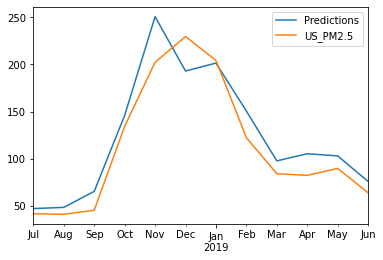

In [32]:
predictions.plot(legend=True)
test.plot(legend=True)

In [33]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean AQI',test.mean())

RMSE =  22.617874988999663
Mean AQI 111.7474604454685


In [2]:
#dividing into train and test:
train=delhi_AQI[:53]
test=delhi_AQI[54:]
# # Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()
# #Obtaining predicted values:
predictions = results.predict(start=54, end=65, typ='levels').rename('Predictions')
# #Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True);

NameError: name 'delhi_AQI' is not defined

In [43]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test[[0,1,2,3,4,5,6,7,8,9,10]]))
print('RMSE = ',RMSE)
print('Mean AQI',test.mean())

RMSE =  29.677234920730548
Mean AQI 91.72860862496792


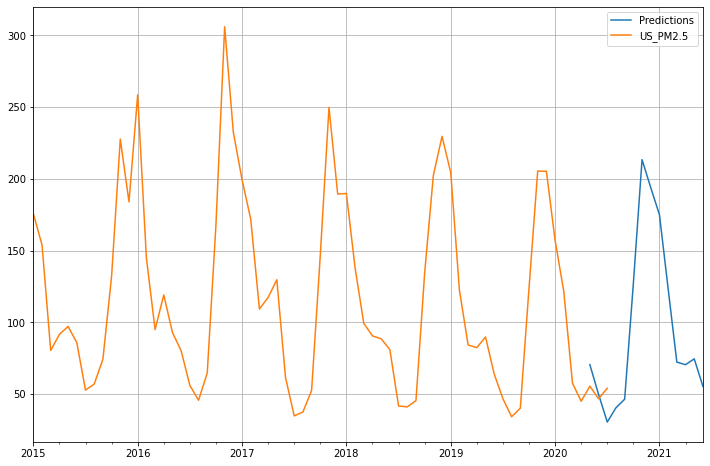

In [44]:
model=SARIMAX(delhi_AQI,order=(1,1,1),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()
# #Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
# #Plotting predicted values against the true values:
predictions.plot(legend=True)
delhi_AQI.plot(legend=True,figsize=(12,8),grid=True);

In [45]:
delhi_AQI = delhi_AQI.to_frame()

In [46]:
delhi_AQI.shape

(67, 1)

In [47]:
delhi_AQI.reset_index()

,index,US_PM2.5
0,2015-01-01,175.690645
1,2015-02-01,153.920357
2,2015-03-01,80.338065
3,2015-04-01,91.562333
4,2015-05-01,97.109355
...,...,...
62,2020-03-01,57.506452
63,2020-04-01,44.940000
64,2020-05-01,55.448710
65,2020-06-01,46.694667


In [82]:
train=delhi_AQI[:-5]
test=delhi_AQI[-5:]

In [49]:
print(train)
print(test)

              US_PM2.5
2015-01-01  175.690645
2015-02-01  153.920357
2015-03-01   80.338065
2015-04-01   91.562333
2015-05-01   97.109355
...                ...
2019-10-01  123.657097
2019-11-01  205.393667
2019-12-01  205.241613
2020-01-01  157.112581
2020-02-01  121.484138

[62 rows x 1 columns]
             US_PM2.5
2020-03-01  57.506452
2020-04-01  44.940000
2020-05-01  55.448710
2020-06-01  46.694667
2020-07-01  54.010000


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [51]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [52]:



from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [54]:
#To give an idea of what generator file holds:
X,y = generator[0]

In [55]:
# We can see that the x array gives the list of values that we are going to predict y of:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.52067934 0.44061273 0.16999232 0.21127285 0.23167365 0.1899956
 0.06846508 0.08391299 0.14750361 0.36018165]
Predict this y: 
 [[0.71198103]]


In [56]:
# defining the model(note that  I am using a very basic model here, a 2 layer model only):
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Fitting the model with the generator object:
model.fit_generator(generator,epochs=450)

Epoch 1/450
52/52 [==============================] - 4s 23ms/step - loss: 0.0944
Epoch 2/450
52/52 [==============================] - 1s 25ms/step - loss: 0.0693
Epoch 3/450
52/52 [==============================] - 1s 25ms/step - loss: 0.0708
Epoch 4/450
52/52 [==============================] - 1s 23ms/step - loss: 0.0601
Epoch 5/450
52/52 [==============================] - 1s 24ms/step - loss: 0.0536
Epoch 6/450
52/52 [==============================] - 1s 24ms/step - loss: 0.0464
Epoch 7/450
52/52 [==============================] - 1s 21ms/step - loss: 0.0381
Epoch 8/450
52/52 [==============================] - 1s 21ms/step - loss: 0.0412
Epoch 9/450
52/52 [==============================] - 1s 21ms/step - loss: 0.0307
Epoch 10/450
52/52 [==============================] - 1s 22ms/step - loss: 0.0278
Epoch 11/450
52/52 [==============================] - 1s 23ms/step - loss: 0.0242: 0s - lo
Epoch 12/450
52/52 [==============================] - 1s 22ms/step - loss: 0.0246
Epoch 13/450
52/

Epoch 100/450
52/52 [==============================] - 1s 23ms/step - loss: 0.0080
Epoch 101/450
52/52 [==============================] - 1s 24ms/step - loss: 0.0080
Epoch 102/450
52/52 [==============================] - 1s 24ms/step - loss: 0.0099
Epoch 103/450
52/52 [==============================] - 1s 27ms/step - loss: 0.0086
Epoch 104/450
52/52 [==============================] - 1s 25ms/step - loss: 0.0085
Epoch 105/450
52/52 [==============================] - 1s 27ms/step - loss: 0.0076
Epoch 106/450
52/52 [==============================] - 2s 38ms/step - loss: 0.0090
Epoch 107/450
52/52 [==============================] - 1s 27ms/step - loss: 0.0075
Epoch 108/450
52/52 [==============================] - 1s 25ms/step - loss: 0.0089
Epoch 109/450
52/52 [==============================] - 1s 28ms/step - loss: 0.0077
Epoch 110/450
52/52 [==============================] - 1s 27ms/step - loss: 0.0079
Epoch 111/450
52/52 [==============================] - 1s 26ms/step - loss: 0.0083
Epoc

52/52 [==============================] - 1s 26ms/step - loss: 0.0025
Epoch 296/450
52/52 [==============================] - 1s 28ms/step - loss: 0.0025
Epoch 297/450
52/52 [==============================] - 2s 37ms/step - loss: 0.0025
Epoch 298/450
52/52 [==============================] - 2s 32ms/step - loss: 0.0019
Epoch 299/450
52/52 [==============================] - 2s 33ms/step - loss: 0.0022: 
Epoch 300/450
52/52 [==============================] - 1s 23ms/step - loss: 0.0019
Epoch 301/450
52/52 [==============================] - 1s 23ms/step - loss: 0.0059
Epoch 302/450
52/52 [==============================] - 1s 21ms/step - loss: 0.0041
Epoch 303/450
52/52 [==============================] - 1s 26ms/step - loss: 0.0032: 0s - loss
Epoch 304/450
52/52 [==============================] - 1s 26ms/step - loss: 0.0019
Epoch 305/450
52/52 [==============================] - 1s 24ms/step - loss: 0.0020
Epoch 306/450
52/52 [==============================] - 1s 23ms/step - loss: 0.0018: 0s -

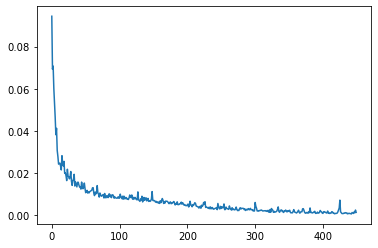

In [58]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [59]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [60]:
true_predictions = scaler.inverse_transform(test_predictions)

In [61]:
test['Predictions'] = true_predictions

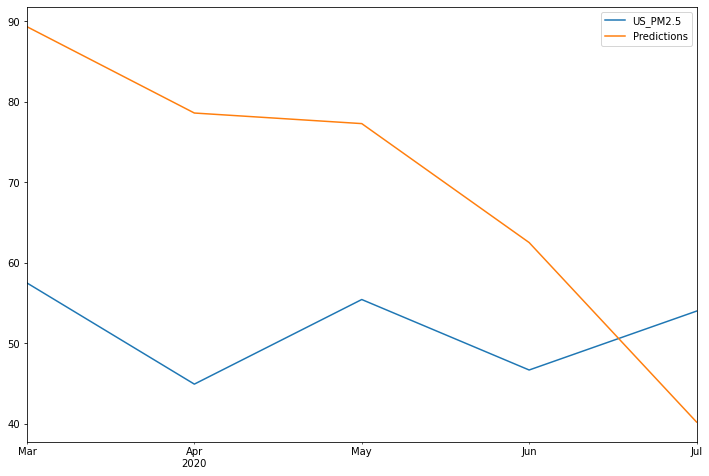

In [62]:
test.plot(figsize=(12,8))
plt.plot(true_predictions)

In [83]:
RMSE=np.sqrt(mean_squared_error(test['delhi_AQI'],test['Predictions']))
print('RMSE = ',RMSE)
print('delhi_AQI=',delhi_AQI['delhi_AQI'].mean())

KeyError: 'delhi_AQI'